## Importer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries

from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras_tuner import RandomSearch
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend


## EDA

In [2]:
picture_size = 48
folder_path = 'C:/Users/mreic/Desktop/Deep_Learning/dataset/images/'

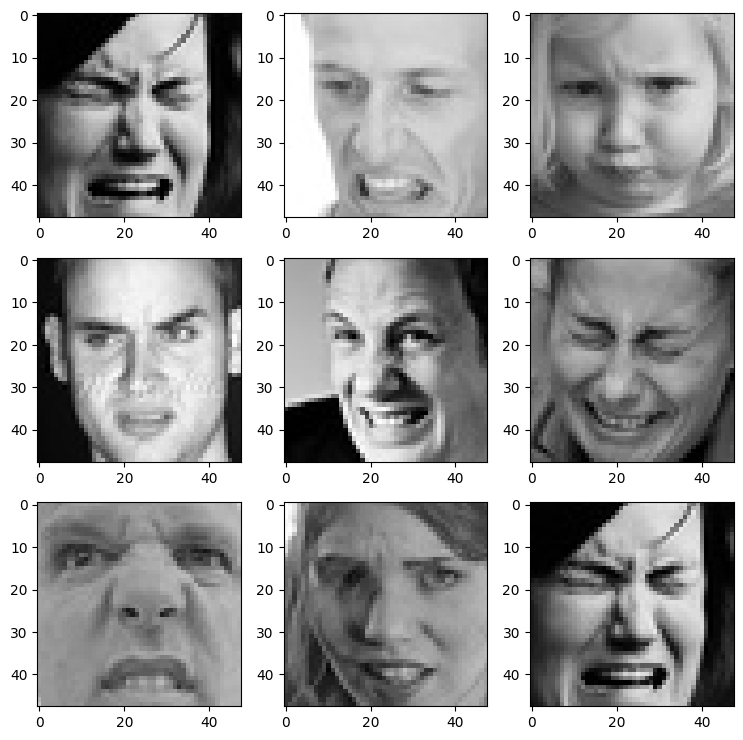

In [333]:
expression = 'disgust'

plt.figure(figsize= (9,9))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Skapar tränings och valideringsdata

In [3]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()


train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# -------------------------------------------------------------------------------------------------------------

# Model 1
Denna modellen är ett kopierad från yt för att testa allt

In [5]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [4]:


checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48
    
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

### Fittar modellen med både träning och validering data

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = val_set,
                                validation_steps = val_set.n//val_set.batch_size,
                                callbacks=callbacks_list
                                )

### Plottar Accuracy & Loss

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Validerar modellen 

In [129]:
results = model.evaluate(val_set)

# Extract the loss and accuracy values
loss, accuracy = results


print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

NameError: name 'model' is not defined

In [ ]:
# 2
val_accuracy = history.history['val_accuracy']
print(np.max(val_accuracy))

In [ ]:
## sparar modellen så att den behöver inte tränas igen 
model.save("model_1")

# ____________________________________________________________

# Model 2 med Keras Tuners

In [132]:


def build_model(hp):
    model4 = keras.Sequential()
    n_cols = 7
    
    # Early stopping callback
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Väljer olika antal conv layers, olika kernel size med batchnormalization, pooling och dropout med olika rates
    for i in range(5):
        model4.add(Conv2D(
            filters=hp.Int(f'conv{i}_filters', min_value=64, max_value=256, step=128),
            kernel_size=hp.Int(f'conv{i}_kernel', min_value=2, max_value=5),
            activation='relu',
            input_shape=(48, 48, 1),
            padding='same'
        ))
        model4.add(BatchNormalization())
        model4.add(MaxPooling2D(pool_size=(2, 2)))
        model4.add(Dropout(hp.Float(f'conv{i}_dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Flatten the output for fully connected layers
    model4.add(Flatten())
    
    # Dense (fully connected) layers med batch normalization och dropout 
    for i in range(2):
        model4.add(Dense(
            units=hp.Int(f'dense{i}_units', min_value=256, max_value=512, step=128),
            activation='relu'
        ))
        model4.add(BatchNormalization())
        model4.add(Dropout(hp.Float(f'dense{i}_dropout', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer for classification
    model4.add(Dense(n_cols, activation='softmax')) 

    # Compile the model
    model4.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model4

# Initialize a Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  
    directory='my_tuner_dir', 
    project_name='my_cnn_project'  
)


Reloading Tuner from my_tuner_dir\my_cnn_project\tuner0.json


In [17]:
tuner.search(
    train_set, 
    validation_data=val_set, 
    epochs = 10,  
    verbose=1
)

Trial 10 Complete [01h 04m 00s]
val_accuracy: 0.5792527794837952

Best val_accuracy So Far: 0.5803849697113037
Total elapsed time: 07h 57m 42s


### Laddar upp bästa hyperparametrar________________________________________________________

Tydligen så sparade inte keras Best Weights 

In [20]:
loaded_tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_tuner_dir',
    project_name='my_cnn_project'
)

NameError: name 'build_model' is not defined

In [5]:
# trial 6 hade de bästa hyperparametrarna
tuner.results_summary()

In [285]:
# Ta fram den bästa modellen 

best_tuned_model = tuner.get_best_models(num_models=1)[0]
best_tuned_model.build()

In [286]:
best_tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 96)        153696    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 96)        3

## Träna den bästa modellen

### optimisera modellen

#### Callbacks

In [182]:
# skapar en lista med optimizers

checkpoint_2 = ModelCheckpoint("./best_cnn_model", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping_2 = EarlyStopping(monitor='val_loss',
                          min_delta=0, 
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate_2 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.99,  # den kommer multipliceras med 0.9 så att den går från 0,01 till 0.0099 till 0.0089..så att den går från 0,01 till 0.0099 till 0.0089.
                              patience=2,  
                              verbose=1
                             ) 

callbacks_list_2 = [early_stopping_2, checkpoint_2, reduce_learningrate_2]

    
best_tuned_model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.009), # enligt keras tuner den bästa var från 0,009 neråt
              metrics=['accuracy'])

### fittar modellen

In [ ]:
model_2 = best_tuned_model.fit(train_set, validation_data = val_set, 
                                       epochs=20, 
                                       batch_size=128, 
                                       callbacks = callbacks_list_2,
                                       verbose = 1)

## Plottar resultatet

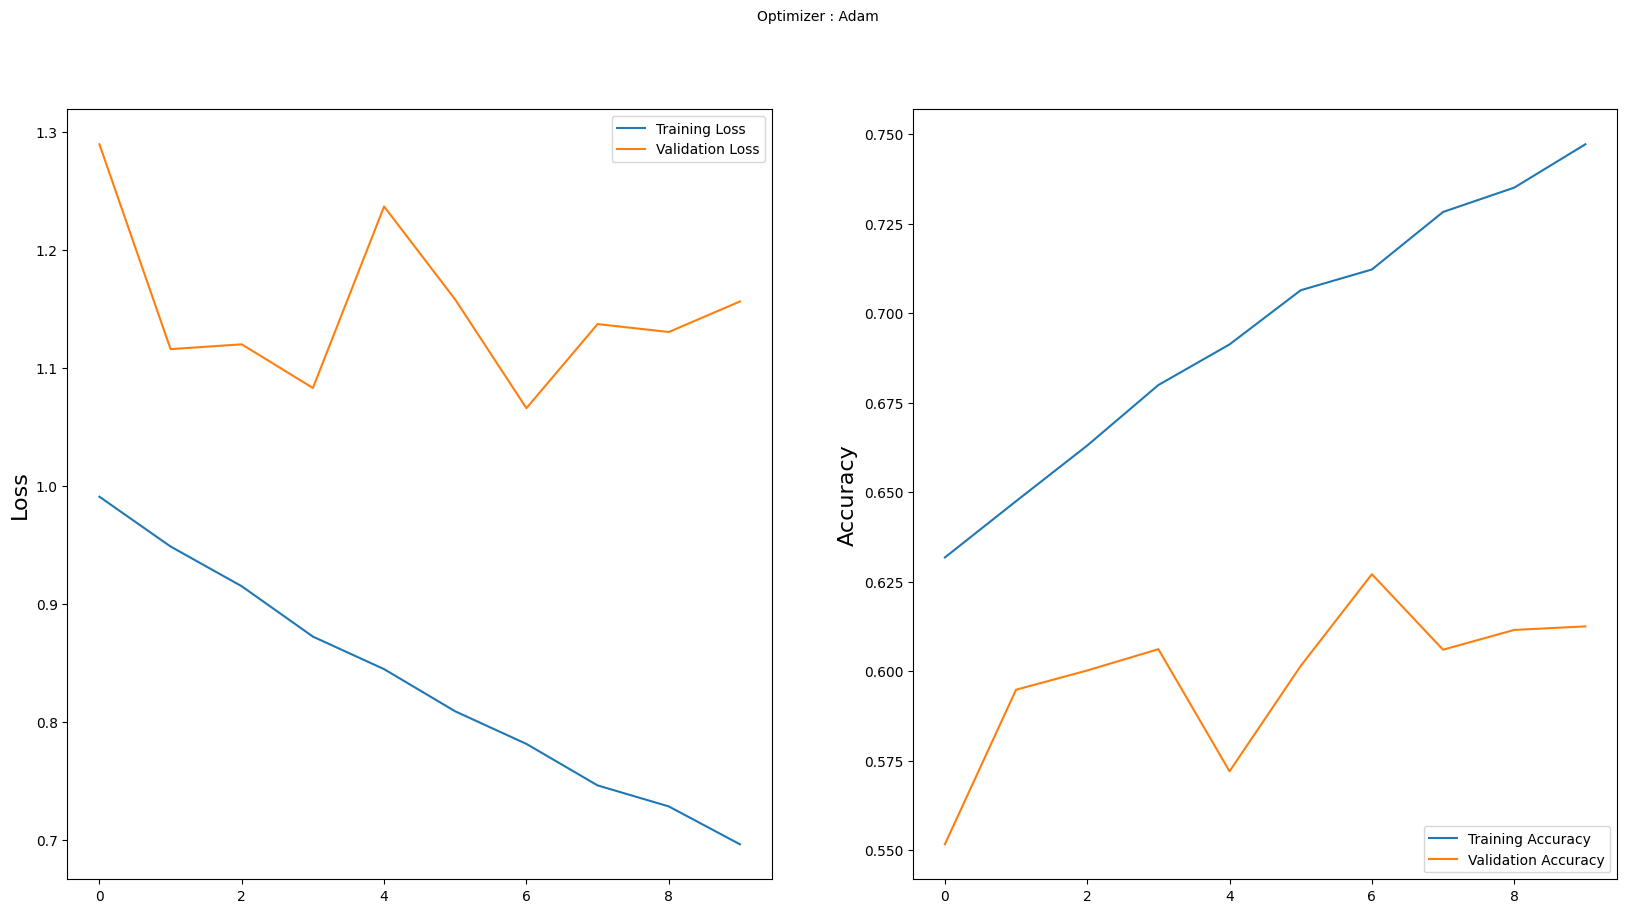

In [178]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_2.history['loss'], label='Training Loss')
plt.plot(model_2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_2.history['accuracy'], label='Training Accuracy')
plt.plot(model_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Modell 3

In [287]:
Ny Keras tuner

In [314]:


def build_model(hp):
    model_3 = keras.Sequential()
    n_cols = 7

    # Väljer olika antal conv layers, olika kernel size med batchnormalization, pooling och dropout med olika rates
    for i in range(6):
        model_3.add(Conv2D(
            filters=hp.Int(f'conv{i}_filters', min_value=64, max_value=512, step=128), #ändrade max value 
            kernel_size=hp.Int(f'conv{i}_kernel', min_value=2, max_value=5),
            activation='relu',
            input_shape=(48, 48, 1),
            padding='same'
        ))
        model_3.add(BatchNormalization())
        model_3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
        model_3.add(Dropout(hp.Float(f'conv{i}_dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Flatten the output for fully connected layers
    model_3.add(Flatten())
    
    # Dense (fully connected) layers med batch normalization och dropout 
    for i in range(1):
        model_3.add(Dense(
            units=hp.Int(f'dense{i}_units', min_value=256, max_value=512, step=128),
            activation='relu'
        ))
        model_3.add(BatchNormalization())
        model_3.add(Dropout(hp.Float(f'dense{i}_dropout', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer for classification
    model_3.add(Dense(n_cols, activation='softmax')) 

    # Compile the model
    model_3.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model_3

# Initialize a Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  
    directory='second_tuner', 
    project_name='second_cnn_tuner'  
)


Reloading Tuner from second_tuner\second_cnn_tuner\tuner0.json


In [315]:
tuner.search(
    train_set, 
    validation_data=val_set, 
    epochs = 5,  
    verbose=1
)

Trial 5 Complete [00h 28m 51s]
val_accuracy: 0.46971413493156433

Best val_accuracy So Far: 0.5537786483764648
Total elapsed time: 09h 13m 47s


In [432]:
# trial 6 hade de bästa hyperparametrarna
tuner.results_summary()

Results summary
Results in second_tuner\second_cnn_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
conv0_filters: 64
conv0_kernel: 5
conv0_dropout: 0.0
conv1_filters: 448
conv1_kernel: 2
conv1_dropout: 0.0
conv2_filters: 448
conv2_kernel: 3
conv2_dropout: 0.4
conv3_filters: 192
conv3_kernel: 3
conv3_dropout: 0.4
conv4_filters: 192
conv4_kernel: 4
conv4_dropout: 0.30000000000000004
conv5_filters: 320
conv5_kernel: 5
conv5_dropout: 0.2
dense0_units: 256
dense0_dropout: 0.2
lr: 0.0006327020117938065
Score: 0.5537786483764648

Trial 01 summary
Hyperparameters:
conv0_filters: 320
conv0_kernel: 3
conv0_dropout: 0.2
conv1_filters: 192
conv1_kernel: 2
conv1_dropout: 0.2
conv2_filters: 448
conv2_kernel: 3
conv2_dropout: 0.2
conv3_filters: 320
conv3_kernel: 2
conv3_dropout: 0.2
conv4_filters: 320
conv4_kernel: 3
conv4_dropout: 0.1
conv5_filters: 64
conv5_kernel: 2
conv5_dropout: 0.2
dense0_units: 512
dense0_dropout: 0.0
lr: 0.000210

In [444]:
# Ta fram den bästa modellen 

best_tuned_model_3 = tuner.get_best_models(num_models=3)[2]
best_tuned_model_3.build()

In [443]:
best_tuned_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 320)       3200      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 320)       1280      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 320)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 320)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 192)       245952    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 192)       7

### Optimiserar modellen

In [446]:
# Skapar modell 3 med ändrade optimizers och flera epoker för att få mindre overfitting
# skapar en lista med optimizers

checkpoint_3 = ModelCheckpoint("./model_3", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping_3 = EarlyStopping(monitor='val_loss', 
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate_3 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,  # den kommer multipliceras med 0.99 så att den går från 0,099 till 0.0098 till 0.0097..
                              patience=2,  
                              verbose=1
                             )  

callbacks_list_3 = [early_stopping_3, checkpoint_3, reduce_learningrate_3]

    
best_tuned_model_3.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.009), # enligt keras tuner den bästa var från 0,009 neråt
              metrics=['accuracy'])

In [447]:
model_3 = best_tuned_model_3.fit(train_set, validation_data = val_set, 
                                       epochs=10, 
                                       batch_size=128, 
                                       callbacks = callbacks_list_2,
                                       verbose = 1)

Epoch 1/10
226/226 [==============================] - 3998s 18s/step - loss: 1.8968 - accuracy: 0.2560 - val_loss: 1.7757 - val_accuracy: 0.2942 - lr: 0.0090
Epoch 2/10
226/226 [==============================] - 5437s 24s/step - loss: 1.6198 - accuracy: 0.3754 - val_loss: 1.6710 - val_accuracy: 0.3572 - lr: 0.0090
Epoch 3/10
226/226 [==============================] - 5023s 22s/step - loss: 1.3586 - accuracy: 0.4758 - val_loss: 1.5329 - val_accuracy: 0.3947 - lr: 0.0090
Epoch 4/10
  6/226 [..............................] - ETA: 1:17:16 - loss: 1.2227 - accuracy: 0.5495

KeyboardInterrupt: 

In [ ]:
# Var tvungen o avbryta, tog extremt lång tid och performade dåligt 

# Plottar modellen

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_3.history['loss'], label='Training Loss')
plt.plot(model_3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_3.history['accuracy'], label='Training Accuracy')
plt.plot(model_3.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# om overfitting uppstår igen --> andra layers upställning

# Model 4

In [4]:
# Ändrat antal batches till pyramid uppställning

model_4 = Sequential()

# input layer 
model_4.add(Conv2D(64, (3, 3), input_shape=(48, 48, 1), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# andra conv layer
model_4.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# tredje conv layer
model_4.add(Conv2D(228, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# fjärde conv layer
model_4.add(Conv2D(320, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# femte conv layer
model_4.add(Conv2D(448, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

#sjätte conv layer
model_4.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1, 1)))  # minskat till från 2,2
model_4.add(Dropout(0.25))

model_4.add(Conv2D(228, (3, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1, 1)))  # minskat till från 2,2
model_4.add(Dropout(0.25))

#föatter layer
model_4.add(Flatten())

# första fully connected layer
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

#fully connected output layer
model_4.add(Dense(7, activation='softmax')) 

# Model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 192)       110784    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 192)       7

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

### optimiserar modellen

In [16]:
checkpoint_4 = ModelCheckpoint("./model_4", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping_4 = EarlyStopping(monitor='val_loss',
                          min_delta = 0, 
                          verbose=1,
                          patience=3,
                          restore_best_weights=True
                          )

reduce_learningrate_4 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
                                 

callbacks_list_4 = [early_stopping_4, checkpoint_4, reduce_learningrate_4]

    
model_4.compile(loss='categorical_crossentropy',
                              optimizer = Adam(learning_rate=0.001), # enligt keras tuner den bästa var från 0,009 neråt
                              metrics=['accuracy'])

In [17]:
model_4

### Fittar modellen

In [6]:

model_4 = best_tuned_model.fit(train_set, validation_data = val_set, 
                                       epochs=30, 
                                       batch_size=128, 
                                       callbacks = callbacks_list_2,
                                       verbose = 1)

## Plottar resultatet

In [ ]:

plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_4.history['loss'], label='Training Loss')
plt.plot(model_4.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_4.history['accuracy'], label='Training Accuracy')
plt.plot(model_4.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
